<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from collections import namedtuple   # Convenient to store the data rows
import matplotlib.pyplot as plt

DATA_FILE = 'chipotle.tsv'

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df = pd.read_csv(DATA_FILE,delimiter='\t')
df.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Part 2: Separate `file_nested_list` into the `header` and the `data`.


---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [3]:
df['item_price'] = df['item_price'].astype(str).str.replace('$', '') # Converted the column to (str) and removed the $ character.
df['item_price'] = df['item_price'].astype(float) # Converted the column to float to be able to work with it as numbers
p_mean = df.item_price.sum()/df.quantity.sum()  #Getting the mean 
p_mean


6.938889782783681

In [5]:
#BONUS
p_median=df.item_price.median() # getting the median
p_mode=df.item_price.mode().get_values()[0] # getting the mode
print("MEAN: ",p_mean,"\nMEDIAN: ",p_median,"\nMODE: ",p_mode) # print all 3 values

MEAN:  6.938889782783681 
MEDIAN:  8.75 
MODE:  8.75


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


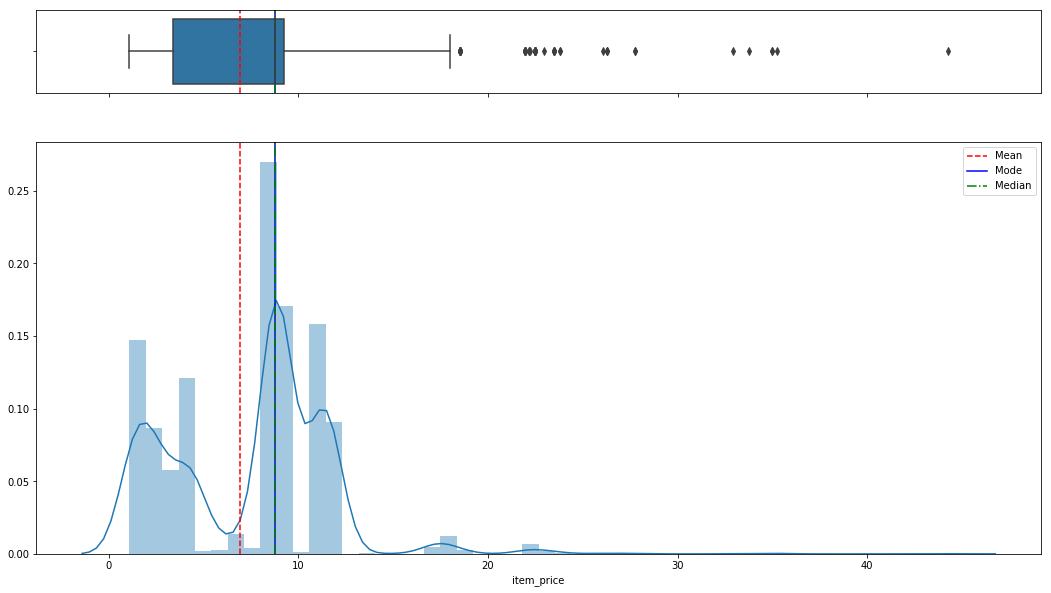

In [14]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,figsize=(18, 10), gridspec_kw= {"height_ratios": (0.8, 4)}) #creating subplot for 2 graphincs the gridspec_kw will determine height size ratio between the 2 graphics.

#Creating a boxplot for item_price column
sns.boxplot(df["item_price"], ax=ax_box)
ax_box.axvline(p_mean, color='r', linestyle='--') # for mean value -> Red color and Dashed line
ax_box.axvline(p_mode, color='b', linestyle='-') # for mode value -> blue color and Dashed line
ax_box.axvline(p_median, color='g', linestyle='-.') # for median value -> Green color and Dash dot line


#Creating a distplot for item_price column
sns.distplot(df["item_price"], ax=ax_hist)
ax_hist.axvline(p_mean, color='r', linestyle='--',label='Mean') # for mean value -> Red color and Dashed line
ax_hist.axvline(p_mode, color='b', linestyle='-',label='Mode') # for mode value -> blue color and Dashed line
ax_hist.axvline(p_median, color='g', linestyle='-.',label='Median') # for median value -> Green color and Dash dot line
plt.legend(loc='upper right')
ax_box.set(xlabel='') #Remove the X label on the boxplot
plt.show() #Show graphics

### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [19]:
canned_sodas= df[df['item_name'].str.contains('Canned')][['item_name','choice_description']] #Get only those items that contains the word "Canned" 
canned_sodas['choice_description'].unique().tolist() # Get only unique values on column choice_description

['[Sprite]',
 '[Dr. Pepper]',
 '[Mountain Dew]',
 '[Diet Dr. Pepper]',
 '[Coca Cola]',
 '[Diet Coke]',
 '[Coke]',
 '[Lemonade]',
 '[Nestea]']

In [21]:
#Bonus
canned_sodas.groupby(['item_name'])['choice_description'].unique() #show unique values per item_name

item_name
Canned Soda          [[Sprite], [Dr. Pepper], [Mountain Dew], [Diet...
Canned Soft Drink    [[Coke], [Sprite], [Lemonade], [Diet Coke], [N...
Name: choice_description, dtype: object

---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [24]:
df['Clean_desc'] = df['choice_description'].str.replace('[', '').str.replace(']', '') #Creates a new column with a cleaned choice_description values || Removed '[' and ']' from strings
df['toppings_count']= df['Clean_desc'].str.count(',')+1 # Counts the amount of commas + 1 to get the topping qty
Burrito_ords= df[df['item_name'].str.contains('Burrito')] # Get orders that contains the word "Burrito"

In [25]:
toppings = Burrito_ords.groupby(['item_name']).toppings_count.sum() 
Borritos_types = Burrito_ords.groupby(['item_name']).quantity.sum()
avgBurritos = (toppings/Borritos_types).sort_values() 
avgBurritos

item_name
Chicken Burrito     4.986464
Barbacoa Burrito    5.142857
Steak Burrito       5.155440
Carnitas Burrito    5.283333
Burrito             5.833333
Veggie Burrito      5.835052
dtype: float64

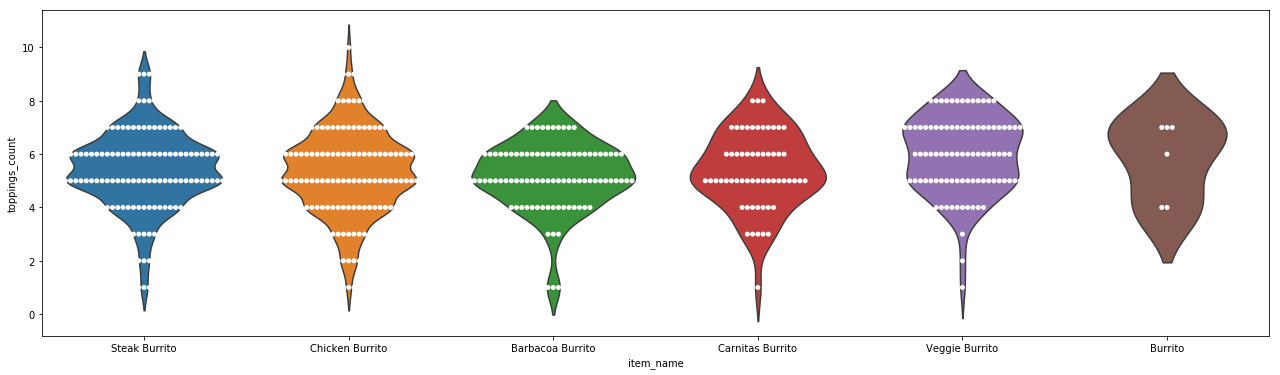

In [30]:
#Bonus
plt.figure(figsize=(22, 6)) # Plot size
g = sns.violinplot(x='item_name',y='toppings_count',data=Burrito_ords, inner=None) #Draws a violinplot in g with item_name and toppings_count
g = sns.swarmplot(x='item_name',y='toppings_count',data=Burrito_ords,color="white", edgecolor="gray") #Draws a swarm plot in g (on top of the violinplot) with item_name and toppings_count

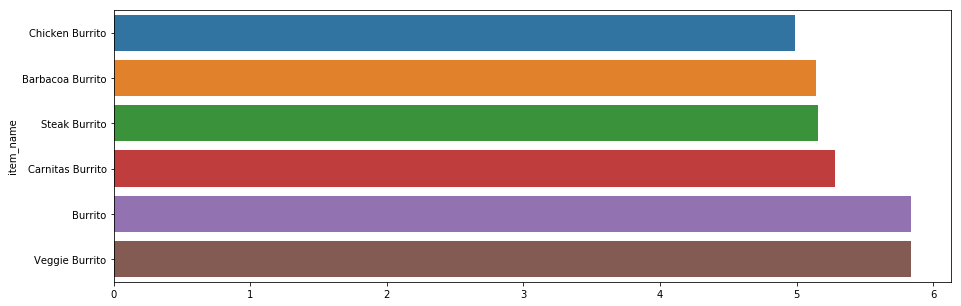

In [31]:
plt.figure(figsize=(15,5)) # Plot size
sns.barplot(avgBurritos.values, avgBurritos.index) #Draws a barplot with item_name and toppings_count AVG

### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [37]:
chips_ords= df[df['item_name'].str.contains('Chips')] #Get the orders that contains the word Chips
unique_chips = chips_ords.groupby(['item_name']).quantity.sum().to_dict() #Group different chips orders | sum qty column | to_dic to create a dictionary
unique_chips

{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 23,
 'Chips and Roasted Chili-Corn Salsa': 18,
 'Chips and Tomatillo Green Chili Salsa': 45,
 'Chips and Tomatillo Red Chili Salsa': 50,
 'Chips and Tomatillo-Green Chili Salsa': 33,
 'Chips and Tomatillo-Red Chili Salsa': 25,
 'Side of Chips': 110}

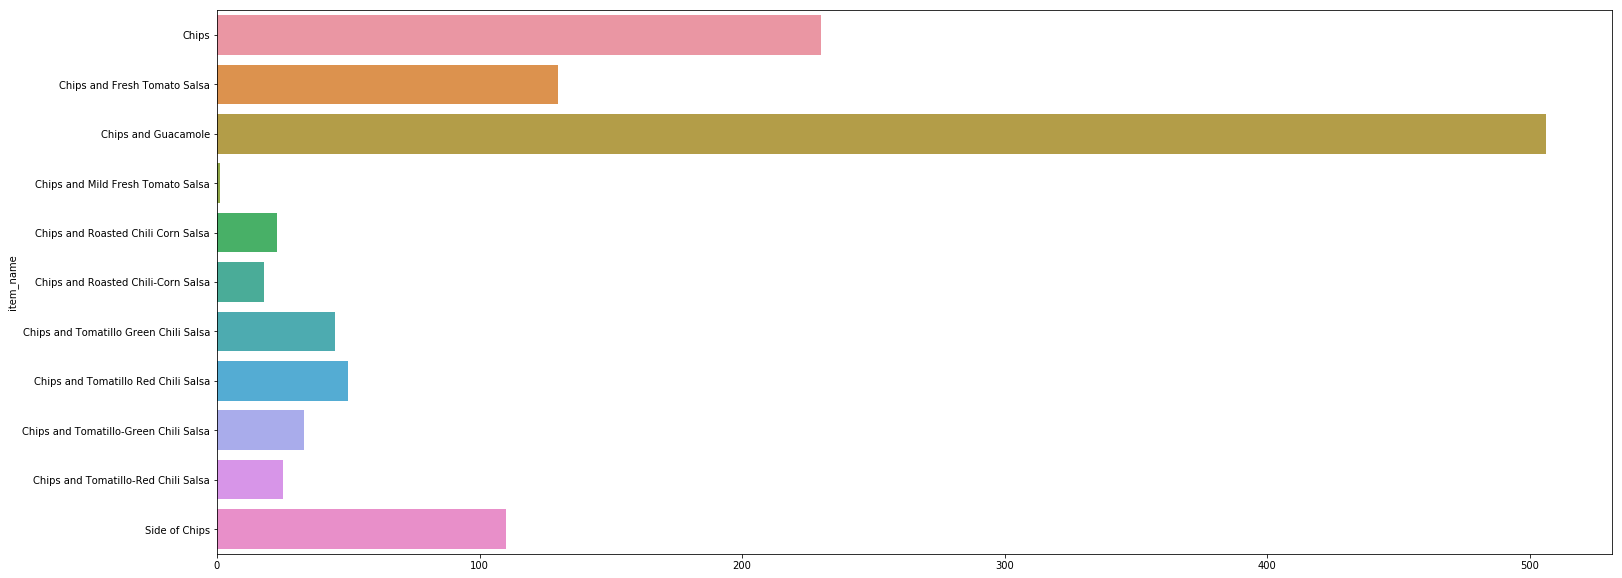

In [38]:
#Bonus
plt.figure(figsize=(25,10)) #Plot size
unique_chips = chips_ords.groupby(['item_name']).quantity.sum() #Group different chips orders | sum qty column 
sns.barplot(unique_chips.values, unique_chips.index) #Create plot

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


## AS BONUS:
### - Created Charts on this project.
### - Did IMDB project including the bonus section..